In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
from matplotlib import pyplot as plt

In [6]:
data_url= "https://proai-datasets.s3.eu-west-3.amazonaws.com/aviation-accidents.csv"
df = pd.read_csv(data_url)
df.head(10)


,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
5,date unk.,Antonov An-12BP,CCCP-12172,Soviet AF,NaN,NaN,Russia,U1,unknown
6,date unk.,Antonov An-2,CCCP-N574,"GUSMP, Directorate of Polar Aviation",NaN,unknown,Russia,A1,unknown
7,date unk.,Antonov An-2,CCCP-01216,Aeroflot,0,Chita region,Russia,A2,unknown
8,date unk.,Antonov An-24B,RA-47794,Russian AF,0,NaN,Russia,A1,unknown
9,date unk.,Antonov An-26,01 red,Soviet AF,0,Orenburg Air Base,Russia,O1,unknown


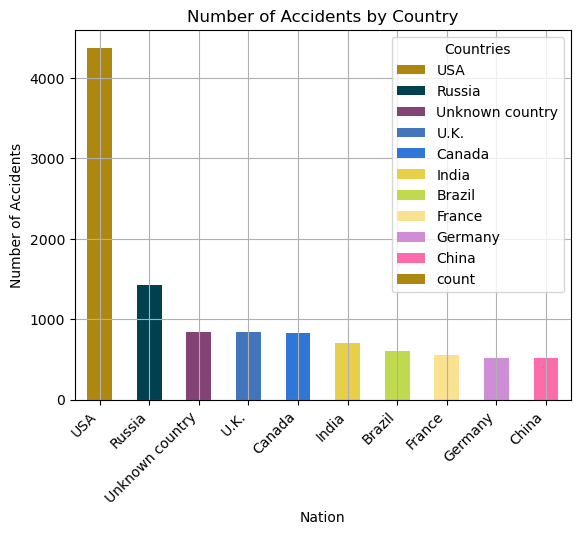

In [9]:
accidents_by_country = df["country"].value_counts().head(10)
COLOR = np.random.rand(len(accidents_by_country),3)

bars = accidents_by_country.plot(kind="bar", color=COLOR)
plt.title("Number of Accidents by Country")
plt.xlabel("Nation")
plt.ylabel("Number of Accidents")
plt.grid()

legend_labels = list(accidents_by_country.index)
for i, label in enumerate(legend_labels):
    bars.patches[i].set_label(label)

plt.legend(title="Countries", loc="upper right")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.show()


<p style="color:blue; font-size:20px"> In this barchart we can see the number of aviation crash by country. The country whith most accident is the USA with over 4000. And we see also the nation with lower crash is a CHINA </p>

In [27]:
print(df['date'].unique())  # prints the various date types in the dataset

<DatetimeArray>
[                'NaT', '1919-08-02 00:00:00', '1919-08-11 00:00:00',
 '1920-02-23 00:00:00', '1920-02-25 00:00:00', '1920-06-30 00:00:00',
 '1920-12-14 00:00:00', '1921-01-15 00:00:00', '1921-03-02 00:00:00',
 '1921-03-04 00:00:00',
 ...
 '2023-04-17 00:00:00', '2023-04-19 00:00:00', '2023-04-21 00:00:00',
 '2023-04-26 00:00:00', '2023-05-09 00:00:00', '2023-05-10 00:00:00',
 '2023-05-11 00:00:00', '2023-05-12 00:00:00', '2023-05-14 00:00:00',
 '2023-05-15 00:00:00']
Length: 14815, dtype: datetime64[ns]


In [7]:
from dateutil import parser

def parse_date(x):
    try:
        return parser.parse(str(x))
    except Exception as e:
        return pd.NaT

# Converts the "date" column to datetime format
df['date'] = df['date'].apply(parse_date)

# Extract the day of the week from the "date" column
df['day_of_week'] = df['date'].dt.day_name()

# Count the number of accidents for each day of the week
accidents_by_day = df['day_of_week'].value_counts()

# Sort days of the week
accidents_by_day = accidents_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print(accidents_by_day)

day_of_week
Monday       3317
Tuesday      3444
Wednesday    3491
Thursday     3516
Friday       3701
Saturday     3186
Sunday       2753
Name: count, dtype: int64


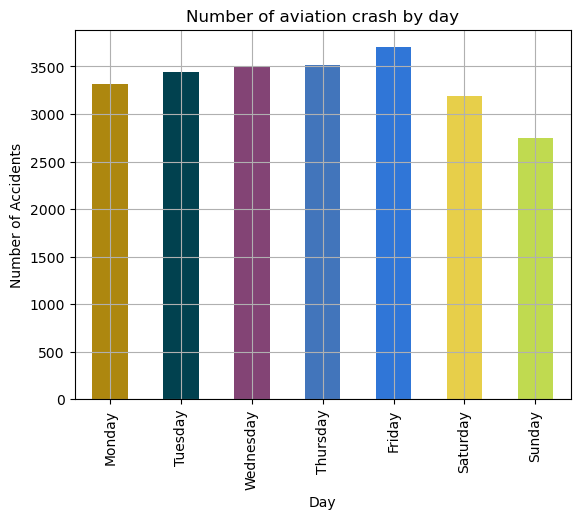

In [10]:
accidents_by_day.plot(kind="bar", color=COLOR)
COLOR = np.random.rand(len(accidents_by_day),3)
plt.title("Number of aviation crash by day")
plt.xlabel("Day")
plt.ylabel("Number of Accidents")
plt.grid()
plt.show()

<span style="color:red; font-size:20px"> This bar show on which day of the week there are more accidents. The unluckiest day is Friday, and shortly after there is Thursday. The day with lower crash is Sunday.   </span>

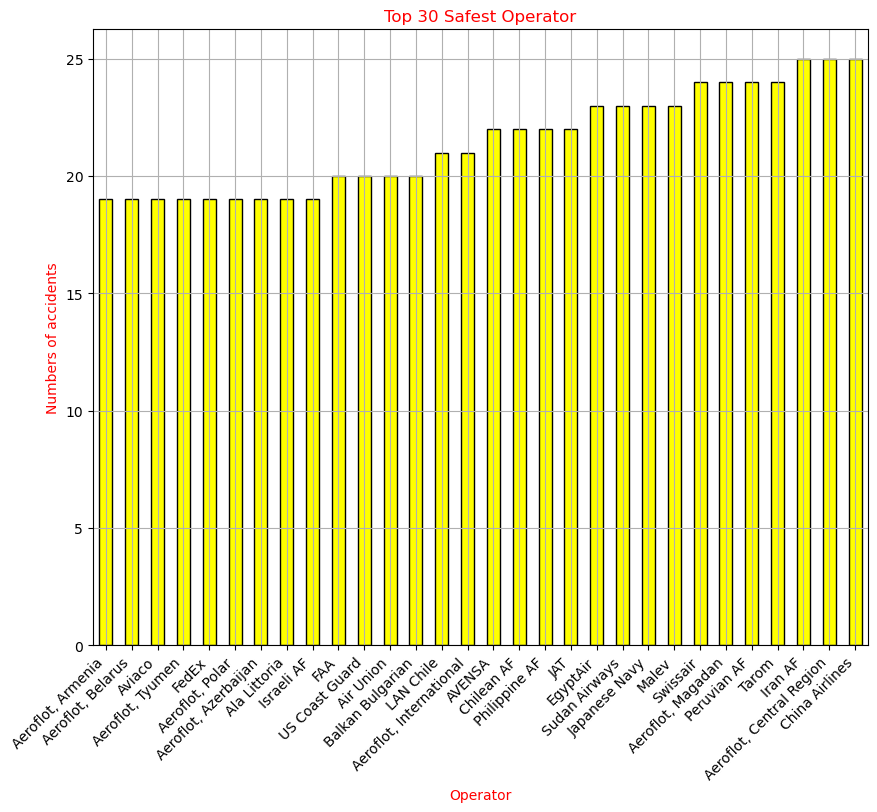

In [14]:

# count number of accident each operator
incident_count_by_operator = df["operator"].value_counts()

# Filter operators who have at least a certain number of incidents (for example, 5)
min_incident_count = 18
safest_operators = incident_count_by_operator[incident_count_by_operator > min_incident_count].sort_values().head(30)

plt.figure(figsize=(10, 8))
safest_operators.plot(kind="bar", color="yellow", edgecolor="black")
plt.title("Top 30 Safest Operator", color="red")
plt.xlabel("Operator", color="red")
plt.ylabel("Numbers of accidents", color="red")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid()
plt.show()



<span style="color:blue; font-size:20px"> This bar shows the top 30 safest airlines. The safests
 airline has only had 18 crashes, such as 'Aeroflot from Armenia', 'Aviaco', and 'Ala Littoria'."</span>

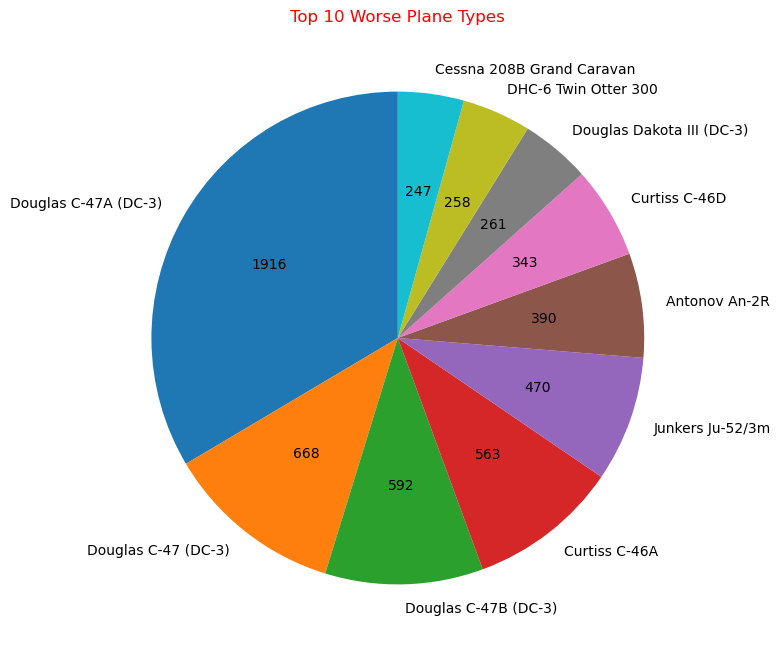

In [12]:
dangerous_by_plane = df['type'].value_counts()
top_plane_types = dangerous_by_plane.head(10)

plt.figure(figsize=(8, 8))

# Crea un grafico a torta
plt.pie(top_plane_types, labels=top_plane_types.index, autopct=lambda p: f'{int(p * sum(top_plane_types) / 100)}', startangle=90)

plt.title("Top 10 Worse Plane Types", color="red")
plt.show()


<span style="color:blue; font-size:20px"> This pie chart shows the list of the 10 worst airplanes on the market. As the graph shows the worst plane is the "Douglas C_47A(DC-3)" with 1916 accident   </span>

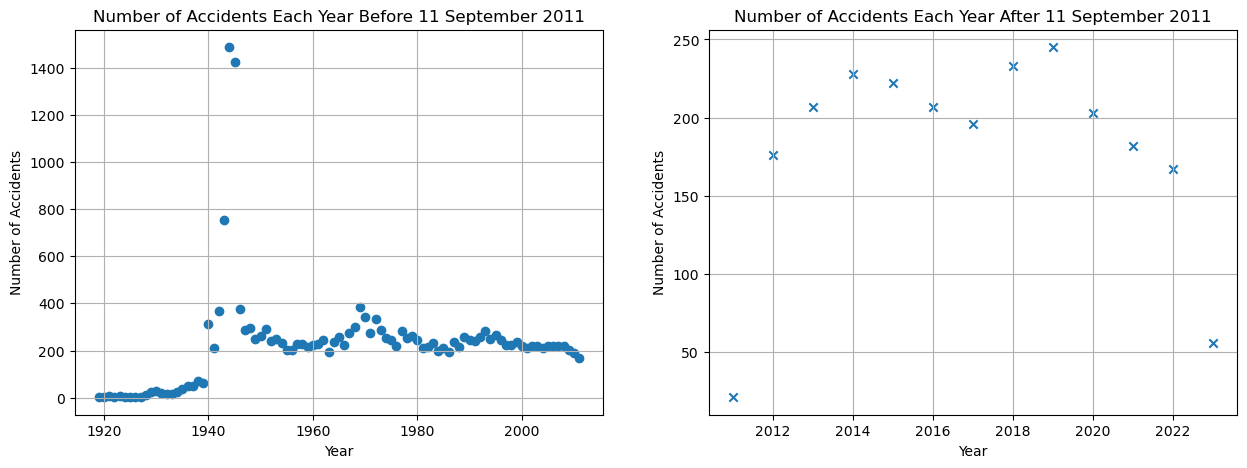

In [14]:

# Converts known dates in "01-JAN-1900" format to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%d-%b-%Y')

# Filter incidents before and after 9/11
accidents_before_11_september = df[df['date'] <= "11-09-2011"]
accidents_after_11_september = df[df['date'] > "11-09-2011"]

# Calculate the number of incidents for years before and after 9/11
accidents_each_year_before = accidents_before_11_september['date'].dt.year.value_counts().sort_index()
accidents_each_year_after = accidents_after_11_september['date'].dt.year.value_counts().sort_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for incidents before 9/11
axes[0].scatter(accidents_each_year_before.index, accidents_each_year_before.values, marker='o', linestyle='-')
axes[0].set_title("Number of Accidents Each Year Before 11 September 2011")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Number of Accidents")
axes[0].grid()

# Plot for incidents after 9/11
axes[1].scatter(accidents_each_year_after.index, accidents_each_year_after.values, marker='x', linestyle='-')
axes[1].set_title("Number of Accidents Each Year After 11 September 2011")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Number of Accidents")
axes[1].grid()

plt.show()


<span style="color:black; font-size:20px"> In these 2 graphs they show the trend of plane crashes before and after 9/11. After 9/11 we can notice a decrease in accidents, already in 2012 we counted less than 20 accidents.   </span>

In [21]:
model_plane =df["type"].value_counts()
numbers_plane =model_plane.head(10)
print(numbers_plane)

type
Douglas C-47A (DC-3)         1916
Douglas C-47 (DC-3)           669
Douglas C-47B (DC-3)          592
Curtiss C-46A                 564
Junkers Ju-52/3m              471
Antonov An-2R                 391
Curtiss C-46D                 344
Douglas Dakota III (DC-3)     262
DHC-6 Twin Otter 300          258
Cessna 208B Grand Caravan     247
Name: count, dtype: int64


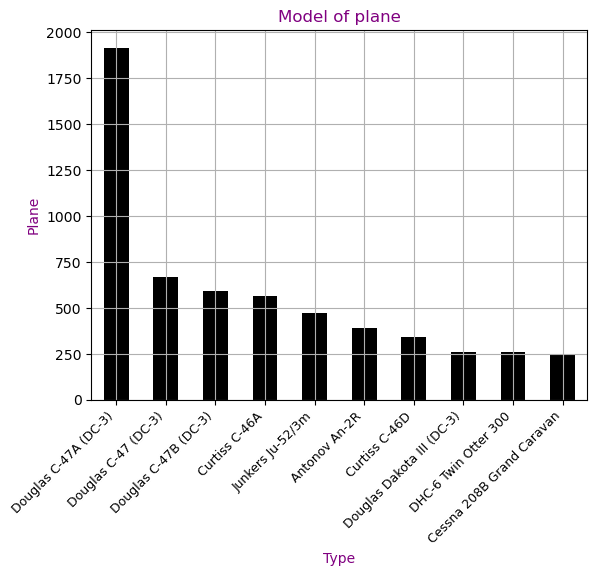

In [22]:
numbers_plane.plot(kind="bar" ,color="black")
plt.title("Model of plane", color="purple")
plt.xlabel("Type", color="purple")
plt.ylabel("Plane", color="purple")
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.grid()
plt.show()

<span style="color:red ; font-size:19px"> This bar chart shows the types of planes used in the market. The most frequently used aircraft in the market is Douglas C  </span>

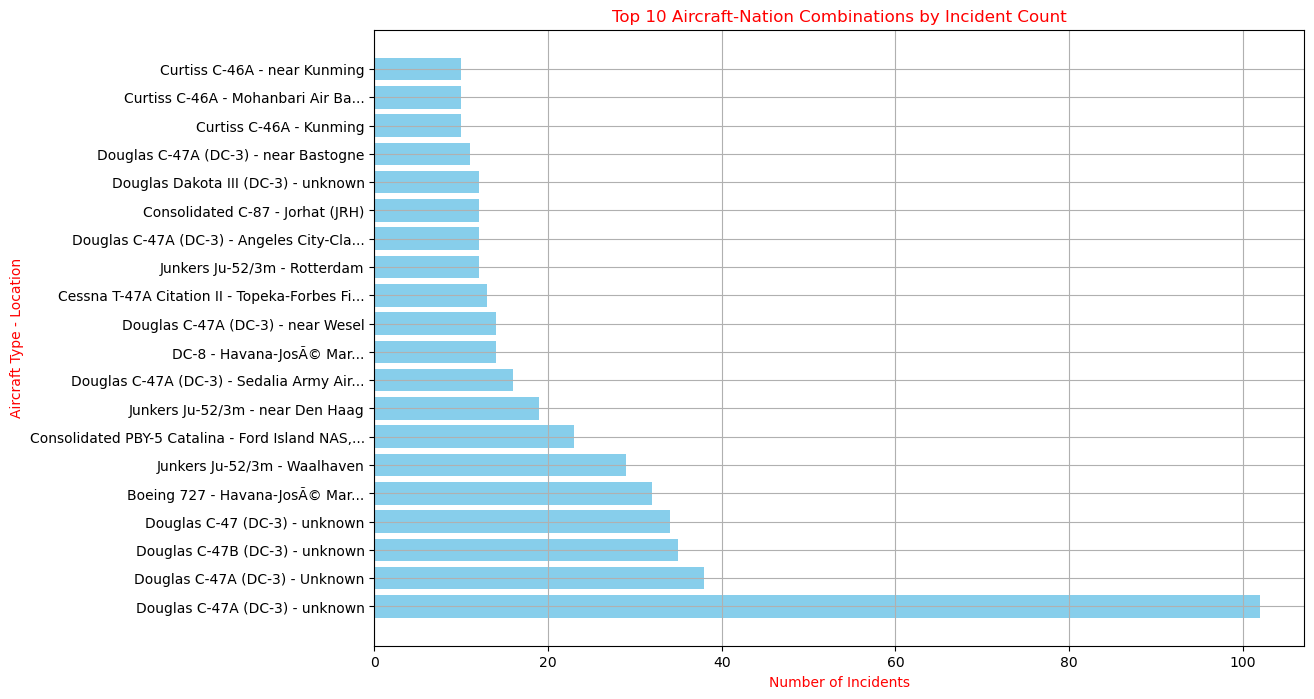

In [23]:
# Count the number of accidents by combination of aircraft and countries
aircraft_nation_counts = df.groupby(['type', 'location']).size().reset_index(name='incident_count')

# Sort by number of incidents in descending order
aircraft_nation_counts = aircraft_nation_counts.sort_values(by='incident_count', ascending=False)

top_aircraft_nation_counts = aircraft_nation_counts.head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_aircraft_nation_counts['type'] + ' - ' + top_aircraft_nation_counts['location'],
         top_aircraft_nation_counts['incident_count'],
         color='skyblue')
plt.xlabel('Number of Incidents', color='red')
plt.ylabel('Aircraft Type - Location', color='red')
plt.title('Top 10 Aircraft-Nation Combinations by Incident Count', color='red')
plt.grid()
plt.show()

<span style="color:blue; font-size:20px"> This horizontal bar chart displays the number of incidents in conjunction with their respective countries. The chart indicates that the Curtiss C-46A aircraft experienced fewer than 20 incidents near Kunming.   </span>

In [17]:
import requests
import geopandas as gpd
import folium
from folium import Choropleth, Marker
from folium.plugins import MarkerCluster

# Download the file shapefile from GitHub
url = 'https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson'
world = gpd.read_file(url)

# Count the number of accidents for each country 
incident_counts_by_country = df['location'].value_counts().reset_index()
incident_counts_by_country.columns = ['country', 'incident_count']
total_incidents = incident_counts_by_country['incident_count'].sum()
print(f"Numero totale di incidenti: {total_incidents}")


# merge the date
merged_data = world.merge(incident_counts_by_country, how='left', left_on='SOVEREIGNT', right_on='country')

# Create a map with Folium
m = folium.Map(location=[0, 0], zoom_start=1)

# Add the cloropleth layer for the counting accident
Choropleth(
    geo_data=merged_data,
    name='choropleth',
    data=merged_data,
    columns=['SOVEREIGNT', 'incident_count'],
    key_on='feature.properties.SOVEREIGNT',
    line_opacity=0.2,
    legend_name='Incident Count'
).add_to(m)

# Add a marker for the coutry with accidents
marker_cluster = MarkerCluster().add_to(m)

for idx, row in merged_data.iterrows():
    if not pd.isnull(row['incident_count']):
        Marker([row.geometry.centroid.y, row.geometry.centroid.x], popup=f"{row['SOVEREIGNT']}: {int(row['incident_count'])} incidents").add_to(marker_cluster)

# Show the map
display(m)




Numero totale di incidenti: 23019


<span style="color:red; font-size:20px"> In this cartogram, it displays the distribution of incidents across various nations.  </span>